In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


In [2]:
df = pd.read_excel (r'cleaning_1.xlsx')
df.shape

(2285, 3)

In [3]:
df.isnull().sum()

question    0
new_id      0
intent      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  2285 non-null   object
 1   new_id    2285 non-null   int64 
 2   intent    2285 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.7+ KB


In [5]:
df['intent'].unique()

array([' drug+dose', 'contageos', 'contagious', 'drug+dose', 'drug+dpse',
       'food+product', 'info', 'Info', 'options', 'reaction', 'symptoms',
       'test', 'vaccine'], dtype=object)

In [6]:
df['intent'].replace(to_replace=[' drug+dose','drug+dose', 'drug+dpse'], value='drugs', inplace=True)
df['intent'].replace(to_replace=['contageos', 'contagious'] ,value ='contageous', inplace=True)
df['intent'].replace(to_replace=['info', 'Info'], value='information', inplace=True)

In [7]:
df['intent'].unique()

array(['drugs', 'contageous', 'food+product', 'information', 'options',
       'reaction', 'symptoms', 'test', 'vaccine'], dtype=object)

In [8]:
df['intent'].value_counts()

symptoms        929
drugs           694
food+product    302
information     225
vaccine          59
test             48
options          22
contageous        5
reaction          1
Name: intent, dtype: int64

In [9]:
df['question'].duplicated().any()

False

In [10]:
indexNames= df[(df['intent'] =='contageous')&(df['intent'] =='information')&(df['intent']=='options')&(df['intent'] =='reaction')].index 


In [11]:
#df=df.drop(indexNames , inplace=True)

In [12]:
#df = df.drop(df[df.intent = [ 'contageous','information', 'options','reaction']].index)

In [13]:
#df.intent.unique()

In [14]:
dff = df[df.intent != 'contageous']

In [15]:
dff.intent.unique()

array(['drugs', 'food+product', 'information', 'options', 'reaction',
       'symptoms', 'test', 'vaccine'], dtype=object)

In [16]:
dff= df[(df['intent'] !='contageous')&(df['intent'] !='information')&(df['intent']!='options')&(df['intent'] !='reaction')]

In [17]:
dff.intent.unique()

array(['drugs', 'food+product', 'symptoms', 'test', 'vaccine'],
      dtype=object)

In [18]:
#cut tttttttttttttttt

# Tokenizing questions

In [19]:
#abubakr clean_str
from ABU_Normalizer import clean_str
from ABU_Normalizer import arabic_cloudcond
from ABU_Normalizer import arabic_cloud

dff['question'] =  dff['question'].apply(lambda x: clean_str(x))

C:\Users\T.Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
#df['question'] =  df['question'].apply(lambda x: nltk.word_tokenize(x))
#df['question'][0]

In [21]:
#df['question'][17]

In [22]:
#pip install python-bidi
#pip install arabic-reshaper

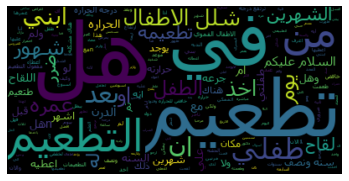

In [23]:
#import arabic_reshaper
#from bidi.algorithm import get_display
#import matplotlib.pyplot as plt
#%matplotlib inline    
arabic_cloudcond(dff['question'],dff['intent'],'vaccine')

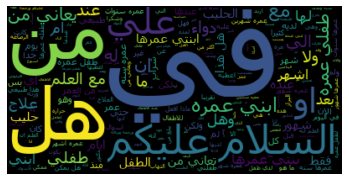

In [24]:
arabic_cloud(dff['question'])

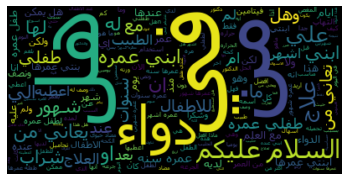

In [25]:
arabic_cloudcond(dff['question'],dff['intent'],'drugs')

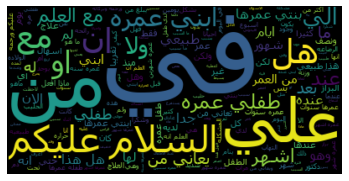

In [26]:
arabic_cloudcond(dff['question'],dff['intent'],'symptoms')

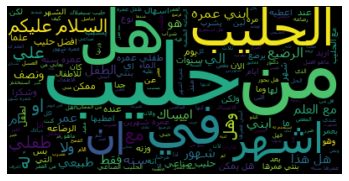

In [27]:
arabic_cloudcond(dff['question'],dff['intent'],'food+product')

In [28]:
dff['question'][0]

'طفلتي لديها حساسيه في الصدر وعندما تاتيها الكحه تكون جافه جدا قال لي احد الاطباء بان هذه الكحه النباحيه فهل من علاج لها عمرها 10 اشهر ولكم جزيل الشكر'

In [29]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')
print(stopwords_list)

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [30]:
text_file = open("untitled.txt", "r" ,encoding = "utf-8")
lines = text_file.readlines()
#print (lines)
#print len(lines)
text_file.close()


egyp=[]
# Using readlines()

file1 = open("untitled.txt", "r" ,encoding = "utf-8")
Lines = file1.readlines()
count = 0
# Strips the newline character
for line in Lines:
    count += 1
    egyp.append(line.strip())
    
    #print( line.strip())
print(egyp)

['من', 'في', 'على', 'و', 'فى', '..', 'يا', 'عن', 'مع', 'ان', 'هو', 'علي', 'ما', '|', 'اللي', 'كل', 'بعد', 'ده', '...', '\u200e', 'اليوم', 'أن', 'يوم', 'انا', 'via', '.', 'إلى', '“:', 'كان', '"', 'ايه', 'اللى', '":', '،', '؟', 'الى', 'دي', 'بين', 'انت', 'أنا', '!', 'حتى', 'لما', 'فيه', 'هذا', 'واحد', '!!', 'احنا', 'اي', 'كده', 'إن', 'او', 'أو', 'عليه', 'ف', 'دى', 'مين', 'الي', 'كانت', 'أمام', ',', 'زي', 'يكون', 'خلال', 'ع', 'كنت', 'هي', 'فيها', 'عند', 'التي', 'الذي', 'قال', 'هذه', '::', 'قد', 'انه', 'ريتويت', 'بعض', '\u200e-', 'أول', 'إيه', 'الآن', 'الان', '....', 'أي', 'منذ', '؟؟', 'عليها', 'له', 'ال', 'تم', 'ب', '#', 'عليك', 'ونحن', 'وهو', 'نحن', 'اى', 'وانا', 'ومن', 'وان', 'وانت', 'أنت', 'هى', 'التى', 'د', 'دا', 'دة', 'انك', 'معانا', 'انهم', 'اننا', 'اني', 'عنها', 'كل', 'كلها', 'حتي', 'منك', 'زى', 'منه', 'معك', 'منكم', 'آن', 'إلي', 'إنه', 'انتا', 'انتي', 'عنك', 'عنه', 'فيهم', 'وأنا', 'وأنت', 'وإن', 'وهى', 'ومع', 'وعن', 'معاكم', 'معاكو', 'معاها', 'معاهم', 'معايا', 'وعليه', 'وانتم', 'و

In [31]:
#dff['question']=dff['question'].apply(lambda words: ' '.join(word.lstrip('ال') for word in words.split() if word not in stopwords_list))
dff['question']=dff['question'].apply(lambda words: ' '.join(word.lstrip('ال') for word in words.split() if word not in egyp))

C:\Users\T.Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
dff['question'][0]

'ديها حساسيه صدر وعندما تاتيها كحه تكون جافه جدا ي حد طباء بان كحه نباحيه فهل علاج ها 10 شهر ولكم جزيل شكر'

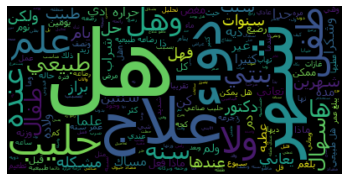

In [33]:
arabic_cloud(dff['question'])

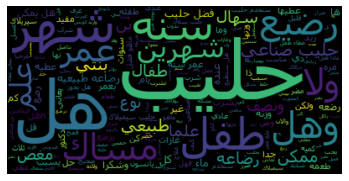

In [34]:
arabic_cloudcond(dff['question'],dff['intent'],'food+product')

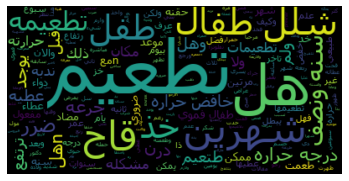

In [35]:
arabic_cloudcond(dff['question'],dff['intent'],'vaccine')

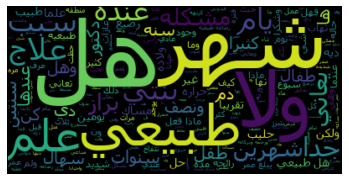

In [36]:
arabic_cloudcond(dff['question'],dff['intent'],'symptoms')

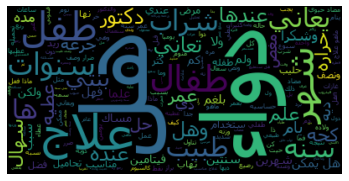

In [37]:
arabic_cloudcond(dff['question'],dff['intent'],'drugs')

In [38]:
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=100)
#tfidf = tfidf_vectorizer.fit_transform(dff['question'])
#tfidf.shape

In [39]:
dff['question'][0]

'ديها حساسيه صدر وعندما تاتيها كحه تكون جافه جدا ي حد طباء بان كحه نباحيه فهل علاج ها 10 شهر ولكم جزيل شكر'

In [40]:
#print(tfidf)

In [41]:
dff['question'][7]

'ريد ستفسار منوم طفال هل يسبب مضاعفات مشاكل صحيه طفل وانواع منومات والجرعات حسب عمار'

In [42]:
X, y = dff.question, dff.intent

from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=10,stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(X).toarray()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
y_pred = classifier.predict(X_test)


In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 79   9  63   0   0]
 [ 12  21  20   0   0]
 [ 35   8 140   0   0]
 [  2   0   6   0   0]
 [  5   0   7   0   0]]
              precision    recall  f1-score   support

       drugs       0.59      0.52      0.56       151
food+product       0.55      0.40      0.46        53
    symptoms       0.59      0.77      0.67       183
        test       0.00      0.00      0.00         8
     vaccine       0.00      0.00      0.00        12

    accuracy                           0.59       407
   macro avg       0.35      0.34      0.34       407
weighted avg       0.56      0.59      0.57       407

0.5896805896805897


C:\Users\T.Mohamed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# one sample test

In [52]:
x="ابنتي ستبلغ 7 أشهر وأنا أعطيها عصير البرتقال لكن قرأت في بعض المقالات أنه مضر بصحة الرضيع ولا يجب إعطائه للرضيع حتى بعد سنة هل هذا صحيح"

In [53]:
c=classifier.predict(tfidfconverter.fit_transform([x]))
print(c)

['drugs']


In [49]:
from flask import Flask, render_template, request , redirect, url_for
app=Flask(__name__)

@app.route('/')
def home():
    return render_template("index.html")
L=[]
@app.route('/login', methods=["POST","GET"])
def login():

    if request.method == "POST":
        user=request.form["nm"]
        z=classifier.predict(tfidfconverter.fit_transform([user]))
        L.append(z)
        return render_template('login.html',L=L)
    else:
        return render_template('login.html')
    
 

# @app.route('/<usr>')
# def user(usr):
#     return f'<h1>{usr}</h1>'


if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2021-04-19 21:41:41,540] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\T.Mohamed\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\T.Mohamed\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\T.Mohamed\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\T.Mohamed\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\T.Mohamed\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\T.Mohamed\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File